In [1]:
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
from scipy.special import factorial

In [2]:
k_means = [1, 8, 64, 512]

def make_clust(k_mean):
    """ make graph and plot hist of clustering
        then return graph.
    """
    N = 10000
    # make graph
    print("[info] Generating Graph")
    G = nx.erdos_renyi_graph(N, k_mean / N)

    # clustering
    print("[info] Calculating clustering")
    g_clustering = np.zeros(N)
    clust = nx.clustering(G)
    # convert clustering from dict to numpy array
    for i in range(N):
        g_clustering[i] = clust[i]
    # plot hist
    plt.hist(g_clustering, bins=40, density=0)
    plt.title("distribution of clustering for <k>=" + str(k_mean))
    plt.savefig('clust' + str(k_mean) + '.jpg', bbox_inches='tight')
    plt.close()
    return G, g_clustering
Gs = []
g_clusts = []
for k_mean in k_means:
    G, g_clust = make_clust(k_mean)
    Gs.append(G)
    g_clusts.append(g_clust)


[info] Generating Graph
[info] Calculating clustering
[info] Generating Graph
[info] Calculating clustering
[info] Generating Graph
[info] Calculating clustering
[info] Generating Graph
[info] Calculating clustering


### Part b

In [9]:
# define the poisson distribution function
def poisson(mean, k):
    return np.exp(- mean) * (mean ** k) / factorial(k)

# function to compare the deg dist with the poisson dist
def comp_deg(G, k_mean):
    N = 10000
    # calculate the degree of each node
    deg = nx.degree(G)
    g_degree = np.zeros(N)
    for i in range(N):
        g_degree[i] = deg[i]
    # use hist to get the data
    dt = plt.hist(g_degree, bins=20, density=1)
    plt.show()
    plt.close()
    prbblty = dt[0]
    bins = dt[1]
    return np.sum(poisson(k_mean, bins[:-1]) - prbblty)

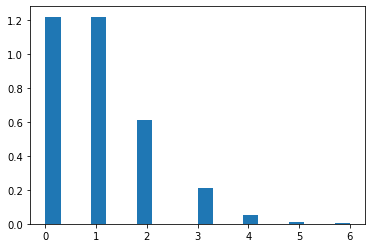

-0.37648935727859484


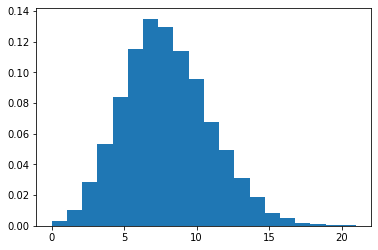

-8.99045618751892e-05


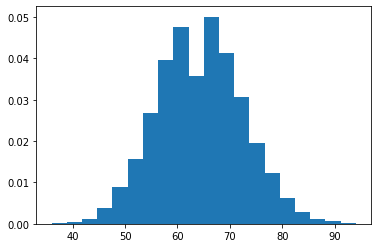

-0.00013615792773730888


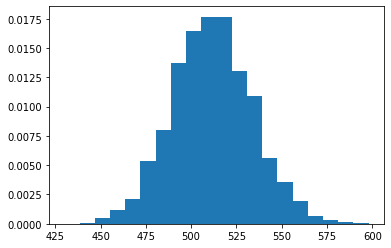

nan


<ipython-input-9-2d8260facaaf>:3: RuntimeWarning: overflow encountered in power
  return np.exp(- mean) * (mean ** k) / factorial(k)
<ipython-input-9-2d8260facaaf>:3: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(- mean) * (mean ** k) / factorial(k)


In [10]:
for i in range(4):
    print(comp_deg(Gs[i], k_means[i]))
    